In [38]:
import pandas as pd

df = pd.read_csv("../data/processed/Cleaned_Telco_Churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [39]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [40]:
x = pd.get_dummies(x, drop_first=True)

-Model Preparation-
    The cleaned dataset was prepared for machine learning by separating input features and the target variable (Churn). Categorical features were encoded using one-hot encoding to make them compatible with machine learning algorithms.

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=12,
    stratify=y
)

-Train-Test Split-
    The dataset was split into training and testing sets using an 80–20 ratio. Stratified sampling was used to maintain the original churn class distribution across both datasets.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

Feature Scaling

Numerical features were standardized using StandardScaler to ensure equal contribution during model training. Scaling was applied using training data statistics to prevent data leakage.

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Logistic Regression Model Training

A Logistic Regression model was trained as a baseline classifier to predict churn probability. This model provides interpretable results and serves as a benchmark for comparison with advanced models.

In [44]:
y_pred = model.predict(x_test_scaled)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.66      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



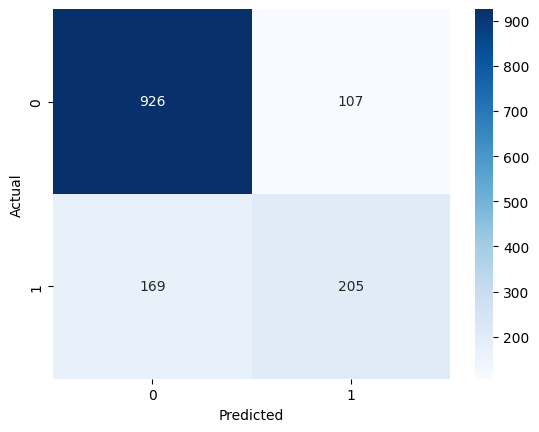

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(x_test_scaled)[:,1]
roc_auc_score(y_test, y_prob)

0.8389250974525162

Logistic Regression Evaluation

The model was evaluated using classification metrics including Precision, Recall, and F1-score. ROC-AUC score was used to measure the model’s ability to distinguish churners from non-churners.

In [48]:
import joblib

joblib.dump(model, "../models/churn_model.pkl")
joblib.dump(scaler, "../models/churn_scaler.pkl")

['../models/churn_scaler.pkl']

In [49]:
y_prob = model.predict_proba(x_test_scaled)[:, 1]

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [51]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8389250974525162


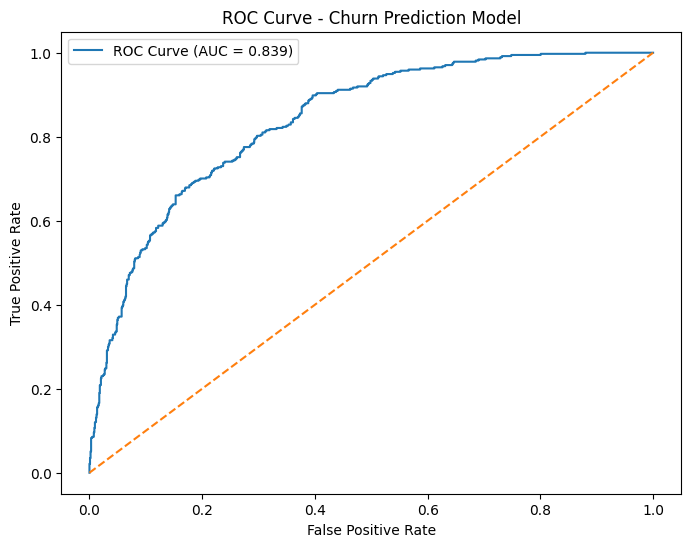

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Churn Prediction Model")
plt.legend()

plt.show()

ROC Curve Visualization

The ROC curve was plotted to visualize model performance across multiple classification thresholds. The area under the ROC curve (AUC) provided an overall measure of model discrimination ability.

Random Forest Model

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

In [54]:
rf_model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Random Forest Model Training

A Random Forest classifier was trained to capture non-linear relationships and feature interactions. This ensemble model helps improve predictive performance compared to linear models.

In [55]:
rf_pred = rf_model.predict(x_test)
rf_prob = rf_model.predict_proba(x_test)[:, 1]

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [57]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf_prob)
print("Random Forest ROC AUC:", rf_auc)

Random Forest ROC AUC: 0.8331801875022649


Random Forest Evaluation

Random Forest predictions were evaluated using classification metrics and ROC-AUC score. Performance was compared against Logistic Regression to identify the better-performing model.

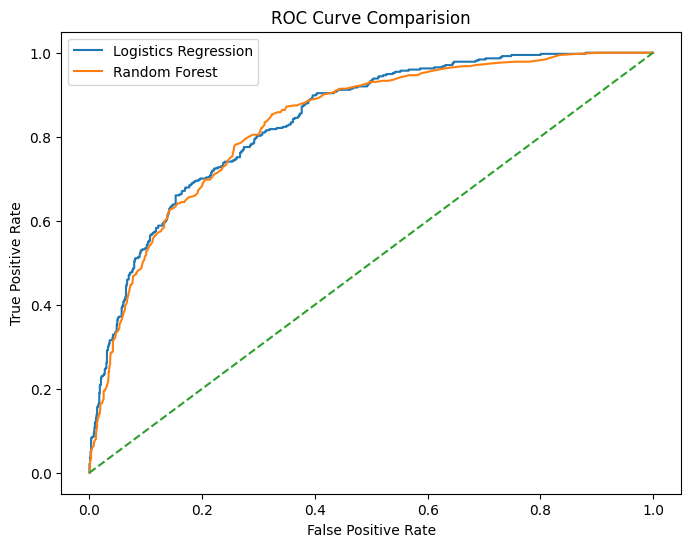

In [58]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, label="Logistics Regression")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot([0,1], [0,1], '--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparision")
plt.legend()
plt.show()

Model Comparison

Both Logistic Regression and Random Forest models showed comparable performance with slight variation across thresholds. Model selection was based on overall ROC performance and interpretability considerations.

In [59]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

feature_importance.head(15)

TotalCharges                      0.198191
tenure                            0.171279
MonthlyCharges                    0.166640
InternetService_Fiber optic       0.038065
PaymentMethod_Electronic check    0.035821
Contract_Two year                 0.031509
gender_Male                       0.029287
OnlineSecurity_Yes                0.026434
PaperlessBilling_Yes              0.026048
Partner_Yes                       0.022966
Contract_One year                 0.022365
OnlineBackup_Yes                  0.022045
TechSupport_Yes                   0.021438
MultipleLines_Yes                 0.020549
SeniorCitizen                     0.020338
dtype: float64

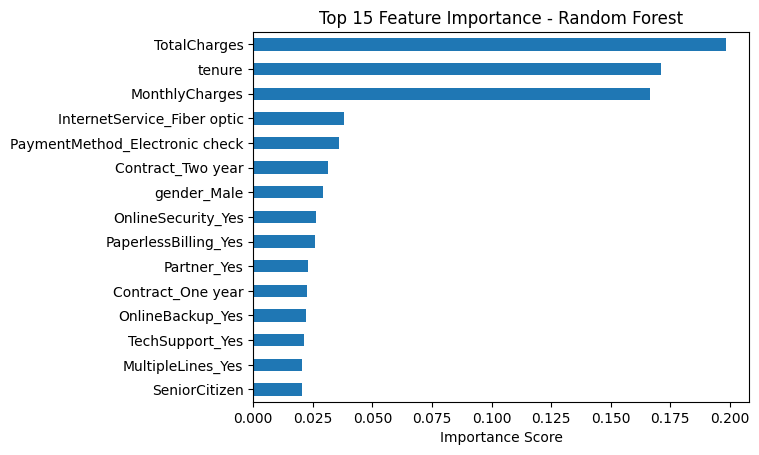

In [60]:
import matplotlib.pyplot as plt

feature_importance.head(15).plot(kind='barh')

plt.title("Top 15 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()

plt.show()

In [61]:
feature_importance.head(10).to_frame("Importance")

,Importance
TotalCharges,0.198191
tenure,0.171279
MonthlyCharges,0.166640
InternetService_Fiber optic,0.038065
PaymentMethod_Electronic check,0.035821
Contract_Two year,0.031509
gender_Male,0.029287
OnlineSecurity_Yes,0.026434
PaperlessBilling_Yes,0.026048
Partner_Yes,0.022966


Feature Importance Analysis

Random Forest feature importance was extracted to identify the strongest drivers of churn. Key features included customer tenure, billing patterns, service type, and payment behavior.

In [62]:
import joblib

joblib.dump(rf_model, "../models/random_forest_churn_model.pkl")

['../models/random_forest_churn_model.pkl']